# Fundamentos de Deep Learning
## Modelo matemático de una neurona artificial, redes neuronales multicapa y funciones de activación

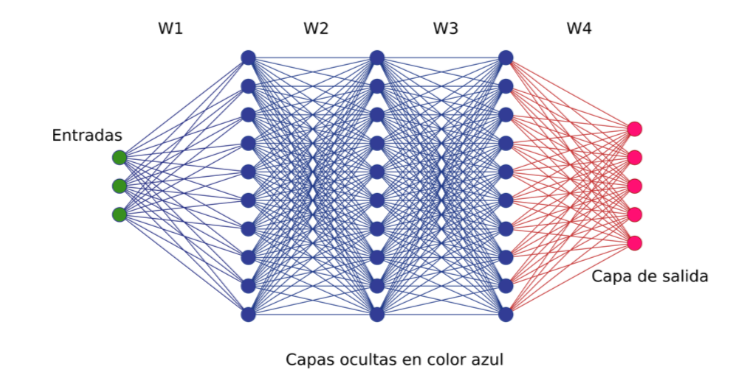

La salida del modelo anterior está dada por:
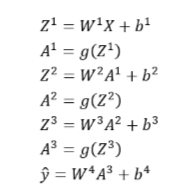

In [ ]:
# Con Numpy
import numpy as np
def scores(X, activation_fcn):
    Z1 = np.dot(W1,X) + b1
    A1 = activation_fcn(Z1)

    Z2 = np.dot(W2,A1) + b2
    A2 = activation_fcn(Z2)
    Z3 = np.dot(W3,A2) + b3
    A3 = activation_fcn(Z3)

    y_hat = np.dot(W4,A3) + b4
    return Z1,A1,Z2,A2,Z3,A3,y_hat



In [ ]:
# Con PyTorch
import torch
import torch.nn as nn
modelo = nn.Sequential(nn.Linear(in_features=3,out_features=10),nn.ReLU(),
                       nn.Linear(in_features=10,out_features=10),nn.ReLU(),
                       nn.Linear(in_features=10,out_features=10),nn.ReLU(),
                       nn.Linear(in_features=3,out_features=5),nn.ReLU(),)

## Backpropagation y gradient descent para actualización de parámetros

In [ ]:
# Softmax
def softmax(x):
    exp_scores = np.exp(x)
    sum_exp_scores = np.sum(exp_scores,axis=0)
    probs = exp_scores/sum_exp_scores
    return probs

PyTorch combina la función **softmax** y **cross entropy** en una única instrucción.

In [ ]:
import torch.nn.functional as F
cost = F.cross_entropy(input=scores,target=yi)

Existen diferentes variantes de descenso por gradiente que permiten que el modelo converja más rápido, por ejemplo, algunos de los algoritmos de optimización más utilizados son SGD con momentum y Adam.

Este proceso es fundamental para las redes neuronales, independientemente de la complejidad del modelo.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
def train(model,optimiser,mb_size,epochs=100):
    for i in range(1000):
        model.train() # Colocar el modelo en modo de entrenamiento
        scores = model(xi) # Hacer forward pass y obtener scores
        cost = F.cross_entropy(input=scores, target = yi.squeeze()) # Calcular costo
        optimiser.zero_grad() # Poner gradiente en ceros
        cost.backward() # Calcular gradientes
        optimiser.step() # Actualizar parámetros

model1 = nn.Sequential(nn.Linear(in_features=3,out_features=10),nn.ReLU(),
                       nn.Linear(in_features=10,out_features=10),nn.ReLU(),
                       nn.Linear(in_features=10,out_features=10),nn.ReLU(),
                       nn.Linear(in_features=10,out_features=5),nn.ReLU())

optimiser = torch.optim.SGD(model1.parameters(),lr=1e-3)

